# Clasificación

## Descripción del Problema
El Centro de Estudios Oncológicos cuenta con la información de pacientes de cáncer de mama. El conjunto de datos fue obtenido en diagnósticos entre 2006 a 2010 y cuenta con la información de 4024 pacientes con diferentes estados de la enfermedad y además con el suceso final del paciente (sobreviviente o no sobreviviente). Poder entender el estado final de una paciente de cáncer se vuelve importante para el Centro por lo que quiere utilizar esta información para tratar de predecir, ante nuevos pacientes, cuál puede ser el estado final de la enfermedad. Contamos con 16 variables que describen el momento de la enfermedad de la paciente.

## Variables
- **Age**: Edad actual del la paciente
- **Race**: Raza de la paciente
- **Marital Status**: Estado civil de la paciente
- **T Stage**: Tamaño o extensión del Tumor
- **N Stage**: Numero o ubicación de los ganglios comprometidos
- **6th Stage**: Estado actual del cancer
- **Differentiate**: Muestra que tan desarrollados estan las celulas cancerigenas
- **Grade**: Grado determinado del cancer
- **A Stage**: Estado de la diseminacion de la enfermedad (Regional: en la zona afectada, Distant: en otras zonas del cuerpo)
- **Tumor size**: Tamaño del tumor en milimetros
- **Estrogen Status**: Estado del estrógeno
- **Regional Node Examined**: Ganglios examinados
- **Reginol Node Positive***: Ganglios positivos con enfermedad
- **Survival Months**: Meses de supervivencia
- **Status**: Estado actual de la paciente(Sobreviviente - Alive; No sobreviviente - Dead)

## Librerias

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
import seaborn as sb

# Preparacion de Datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

# Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Busqueda de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluacion
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Advertencias
import warnings
warnings.filterwarnings("ignore")


In [2]:
# configuración aletoriedad
np.random.seed(123)
set_config(display = 'diagram', transform_output='pandas')
sb.set_theme(style='darkgrid')
plt.style.use("Solarize_Light2") # or default

## Cargar Datos

In [3]:
data_raw = pd.read_csv("datos_medicina.csv")
data_raw.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

## Exploración de Datos

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

### Exploracion Univariable

In [5]:
data_raw.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

In [6]:
data_raw.describe(include="object")

Race Marital Status T Stage  N Stage 6th Stage  \
count    4024           4024     4024    4024      4024   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     3413           2643     1786    2732      1305   

                    differentiate Grade   A Stage Estrogen Status  \
count                        4024  4024      4024            4024   
unique                          4     4         2               2   
top     Moderately differentiated     2  Regional        Positive   
freq                         2351  2351      3932            3755   

       Progesterone Status Status  
count                 4024   4024  
unique                   2      2  
top               Positive  Alive  
freq                  3326   3408

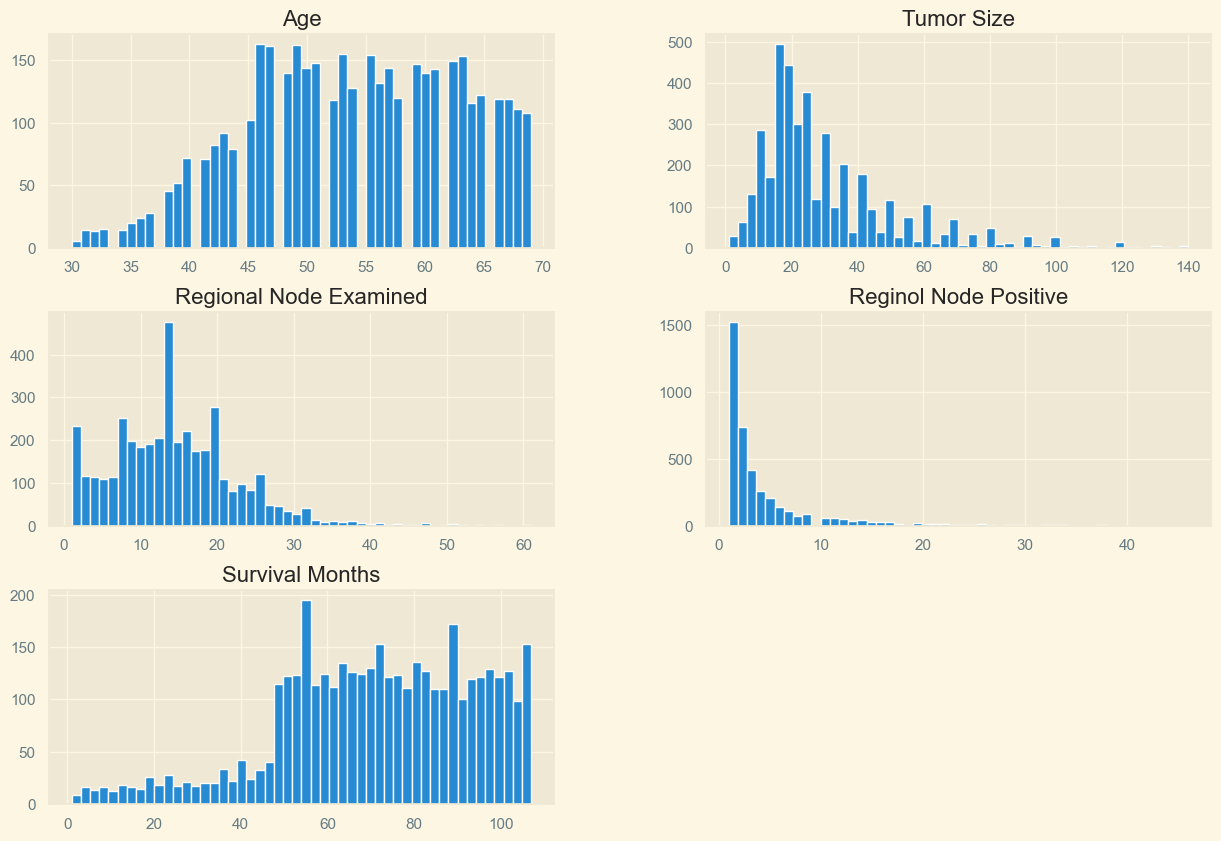

In [7]:
data_raw.hist(bins=50, figsize=(15, 10))
plt.show()

In [8]:
data_raw["Marital Status"].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

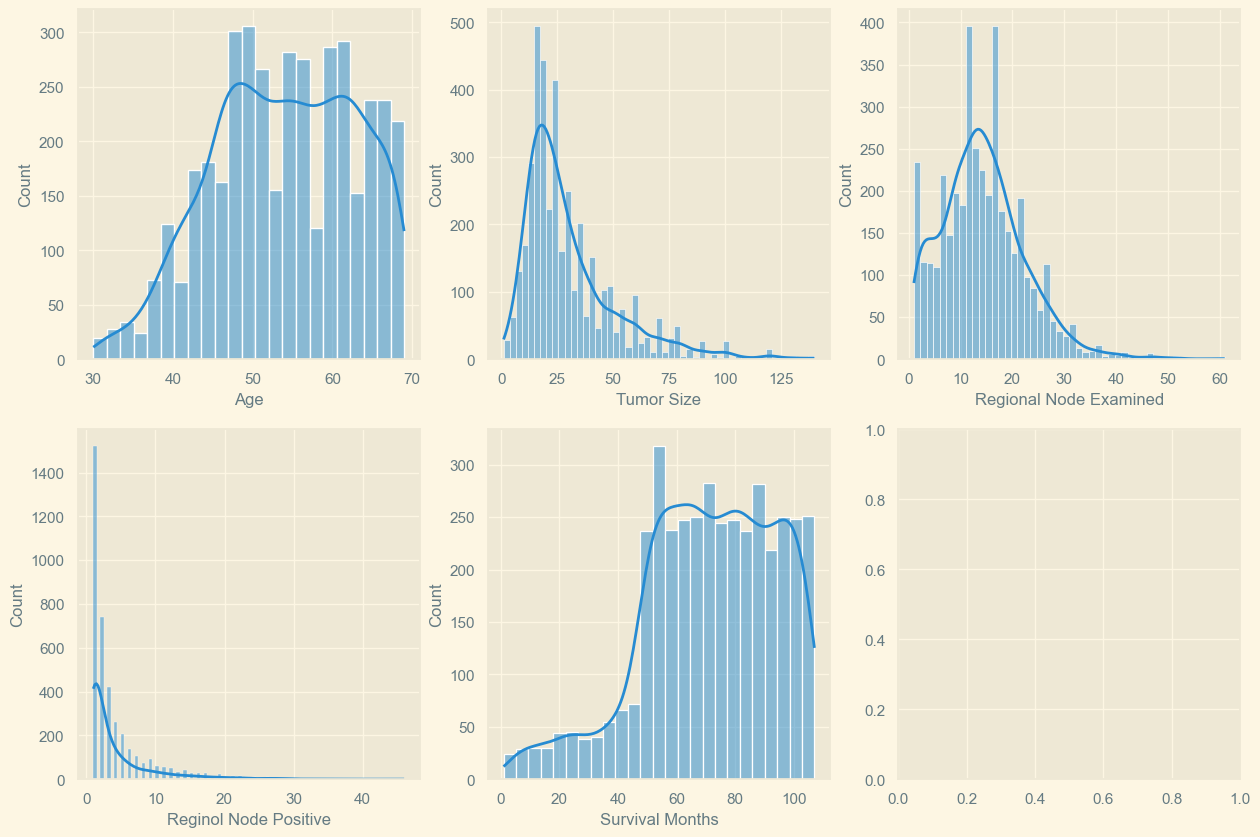

In [9]:
fig, ax = plt.subplots(2, 3, figsize= (15, 10))
sb.histplot(data=data_raw, x="Age", kde=True, ax= ax[0,0])
sb.histplot(data=data_raw, x="Tumor Size", kde=True, ax= ax[0,1])
sb.histplot(data=data_raw, x="Regional Node Examined", kde=True, ax= ax[0,2])
sb.histplot(data=data_raw, x="Reginol Node Positive", kde=True, ax= ax[1,0])
sb.histplot(data=data_raw, x="Survival Months", kde=True, ax= ax[1,1])

plt.show()

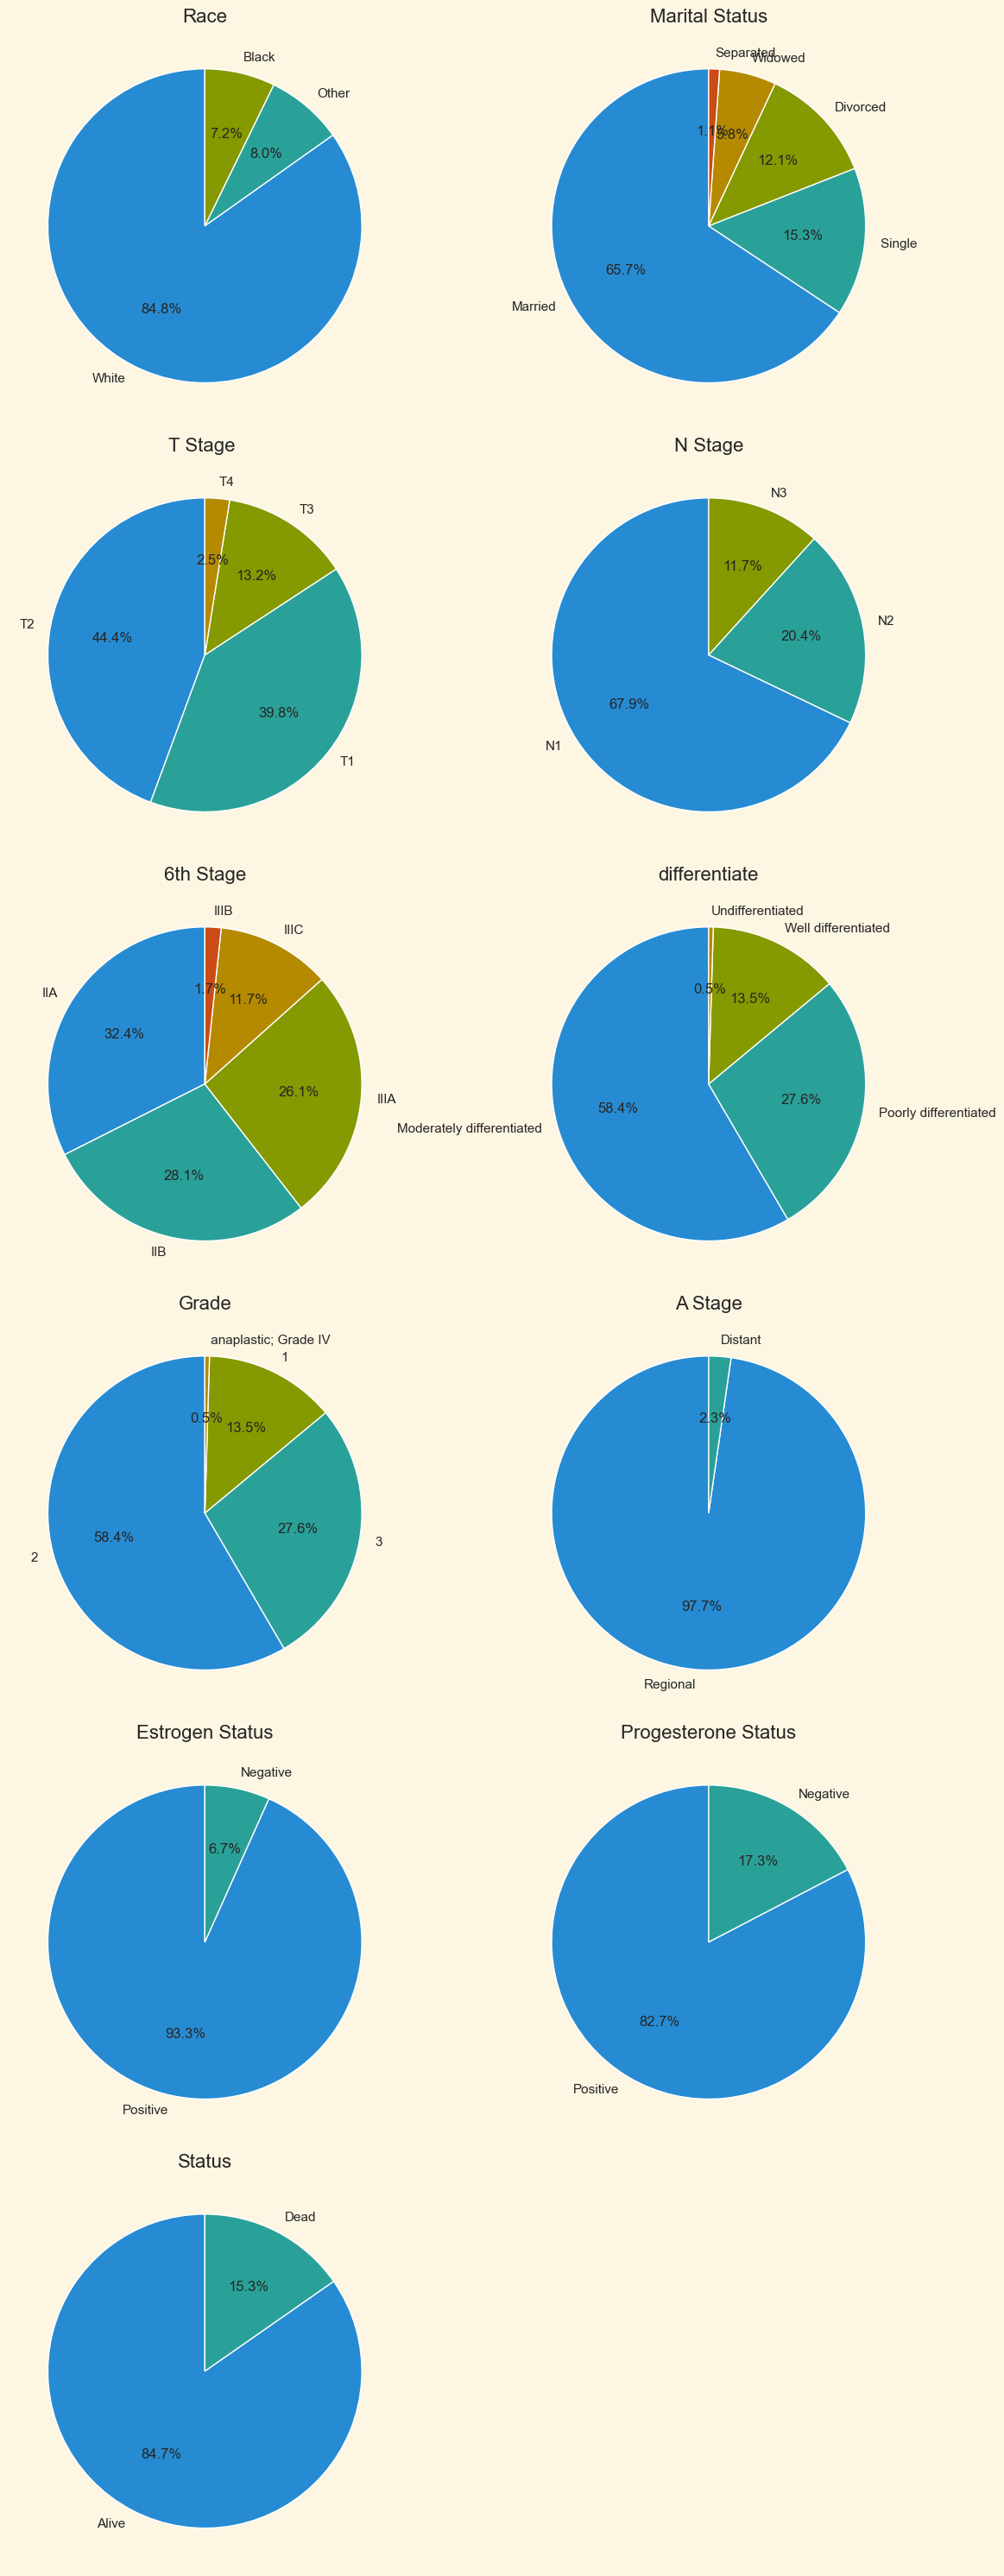

In [10]:
object_columns = data_raw.select_dtypes(include='object').columns
num_cols = 2
num_rows = (len(object_columns) + num_cols - 1) // num_cols  # Calculate rows needed
# Create subplots for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))

# Flatten the axes array for easy iteration, in case of a 2D array
axes = axes.flatten()

# Loop through each object column and plot pie charts
for i, col in enumerate(object_columns):
    value_counts = data_raw[col].value_counts()
    
    # Plot the pie chart in the corresponding grid cell
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

# Hide any unused subplots if there are fewer columns than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# for col in data_raw.select_dtypes(include='object').columns:
#     value_counts = data_raw[col].value_counts()

#     plt.figure(figsize=(6, 6))
#     plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
#     plt.title(col)
#     plt.show()

Variables candidata a ser eliminadas:
- _A Stage_
- _Estrogen Status_
- _Progesterone Status_

### Exploración Bi-variado

#### Pairplot

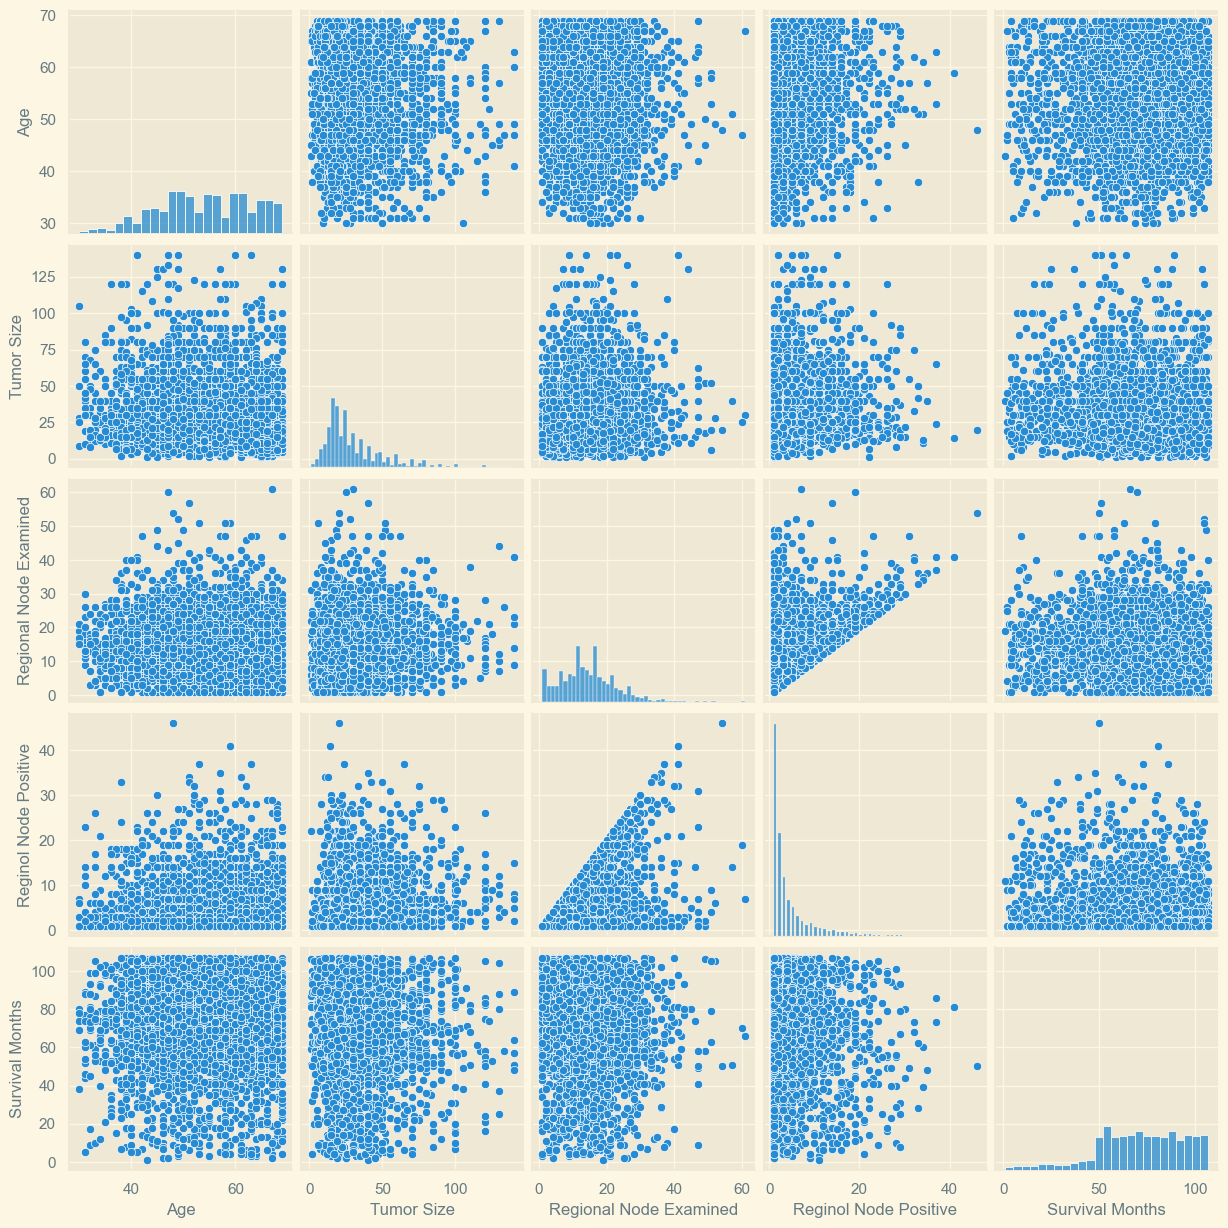

In [11]:
sb.pairplot(data=data_raw)
plt.show()

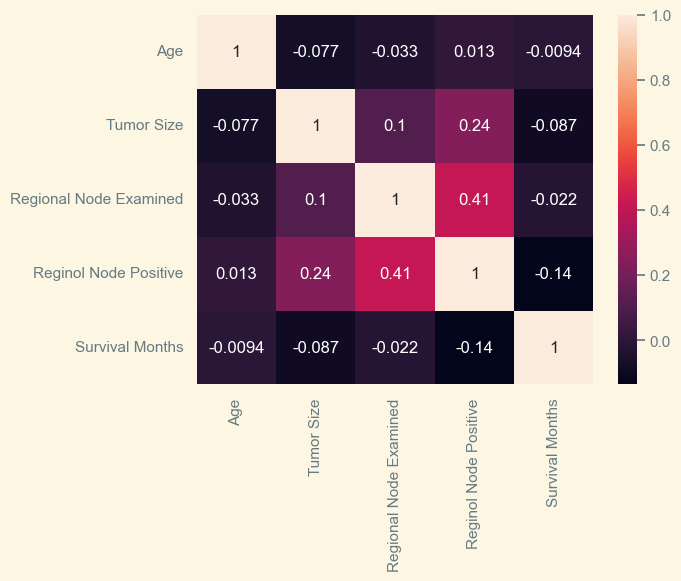

In [12]:
sb.heatmap(data_raw.corr(numeric_only=True), annot=True)
plt.show()

### Exploración Multivariable

#### Pairplot

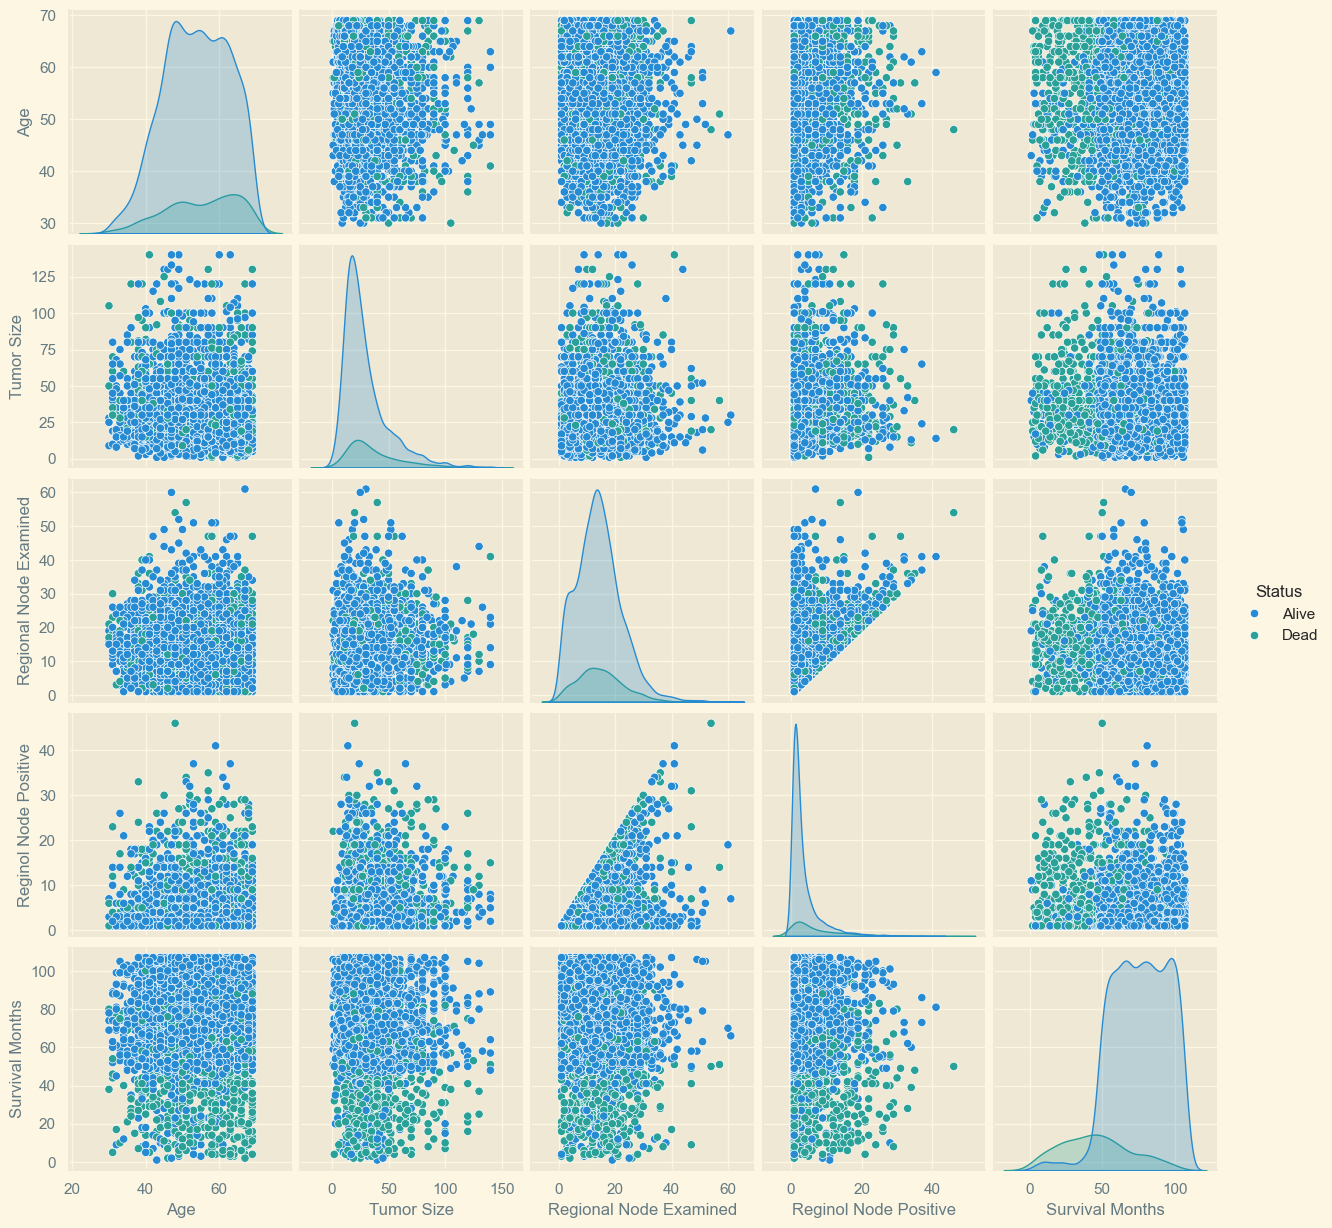

In [13]:
sb.pairplot(data=data_raw, hue="Status")
plt.show()

## Preparación Datos

In [14]:
data = data_raw.copy()
data = data.drop(["A Stage", "Progesterone Status", "Estrogen Status"], axis = 1)
data.head(10)

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   
5   51  White        Single        T1      N1       IIA   
6   51  White        Married       T1      N1       IIA   
7   40  White        Married       T2      N1       IIB   
8   40  White       Divorced       T4      N3      IIIC   
9   69  White        Married       T4      N3      IIIC   

               differentiate Grade  Tumor Size  Regional Node Examined  \
0      Poorly differentiated     3           4                      24   
1  Moderately differentiated     2          35                      14   
2  Moderately differentiated     2          63                      14   
3      Poorly differentiated     3          18                       2   
4      Poorly differentiated     3          41                       3   
5  Moderately differentiated     2          20                      18   
6        Well differentiated     1           8                      11   
7  Moderately differentiated     2          30                       9   
8      Poorly differentiated     3         103                      20   
9        Well differentiated     1          32                      21   

   Reginol Node Positive  Survival Months Status  
0                      1               60  Alive  
1                      5               62  Alive  
2                      7               75  Alive  
3                      1               84  Alive  
4                      1               50  Alive  
5                      2               89  Alive  
6                      1               54  Alive  
7                      1               14   Dead  
8                     18               70  Alive  
9                     12               92  Alive

In [15]:
data_dead = data[data["Status"] == "Dead"]
data_dead.shape

(616, 13)

In [16]:
data_alive = data[data["Status"] == "Alive"]
data_alive.shape

(3408, 13)

#### Resampling

In [17]:
factor = 3

In [18]:
data_dead_re = data_dead.sample(data_dead.shape[0]*factor, replace=True)
data_dead_re.shape

(1848, 13)

In [19]:
data_re = pd.concat([data_alive, data_dead_re]).reset_index(drop=True)
data_re.head(10)

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   
5   51  White        Single        T1      N1       IIA   
6   51  White        Married       T1      N1       IIA   
7   40  White       Divorced       T4      N3      IIIC   
8   69  White        Married       T4      N3      IIIC   
9   46  White        Married       T3      N1      IIIA   

               differentiate Grade  Tumor Size  Regional Node Examined  \
0      Poorly differentiated     3           4                      24   
1  Moderately differentiated     2          35                      14   
2  Moderately differentiated     2          63                      14   
3      Poorly differentiated     3          18                       2   
4      Poorly differentiated     3          41                       3   
5  Moderately differentiated     2          20                      18   
6        Well differentiated     1           8                      11   
7      Poorly differentiated     3         103                      20   
8        Well differentiated     1          32                      21   
9      Poorly differentiated     3          59                      11   

   Reginol Node Positive  Survival Months Status  
0                      1               60  Alive  
1                      5               62  Alive  
2                      7               75  Alive  
3                      1               84  Alive  
4                      1               50  Alive  
5                      2               89  Alive  
6                      1               54  Alive  
7                     18               70  Alive  
8                     12               92  Alive  
9                      3               92  Alive

In [20]:
data_re.shape

(5256, 13)

In [21]:
data_re.describe()

Age   Tumor Size  Regional Node Examined  \
count  5256.000000  5256.000000             5256.000000   
mean     54.328196    32.002664               14.554224   
std       9.084767    22.211003                8.103030   
min      30.000000     1.000000                1.000000   
25%      47.750000    17.000000                9.000000   
50%      55.000000    25.000000               14.000000   
75%      62.000000    40.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            5256.000000      5256.000000  
mean                5.012367        65.158105  
std                 5.957895        25.663465  
min                 1.000000         1.000000  
25%                 1.000000        50.000000  
50%                 2.000000        66.000000  
75%                 6.000000        86.000000  
max                46.000000       107.000000

In [22]:
data_re.describe(include = "object")

Race Marital Status T Stage  N Stage 6th Stage  \
count    5256           5256     5256    5256      5256   
unique      3              5        4       3         5   
top     White        Married       T2      N1       IIA   
freq     4421           3352     2401    3220      1479   

                    differentiate Grade Status  
count                        5256  5256   5256  
unique                          4     4      2  
top     Moderately differentiated     2  Alive  
freq                         2954  2954   3408

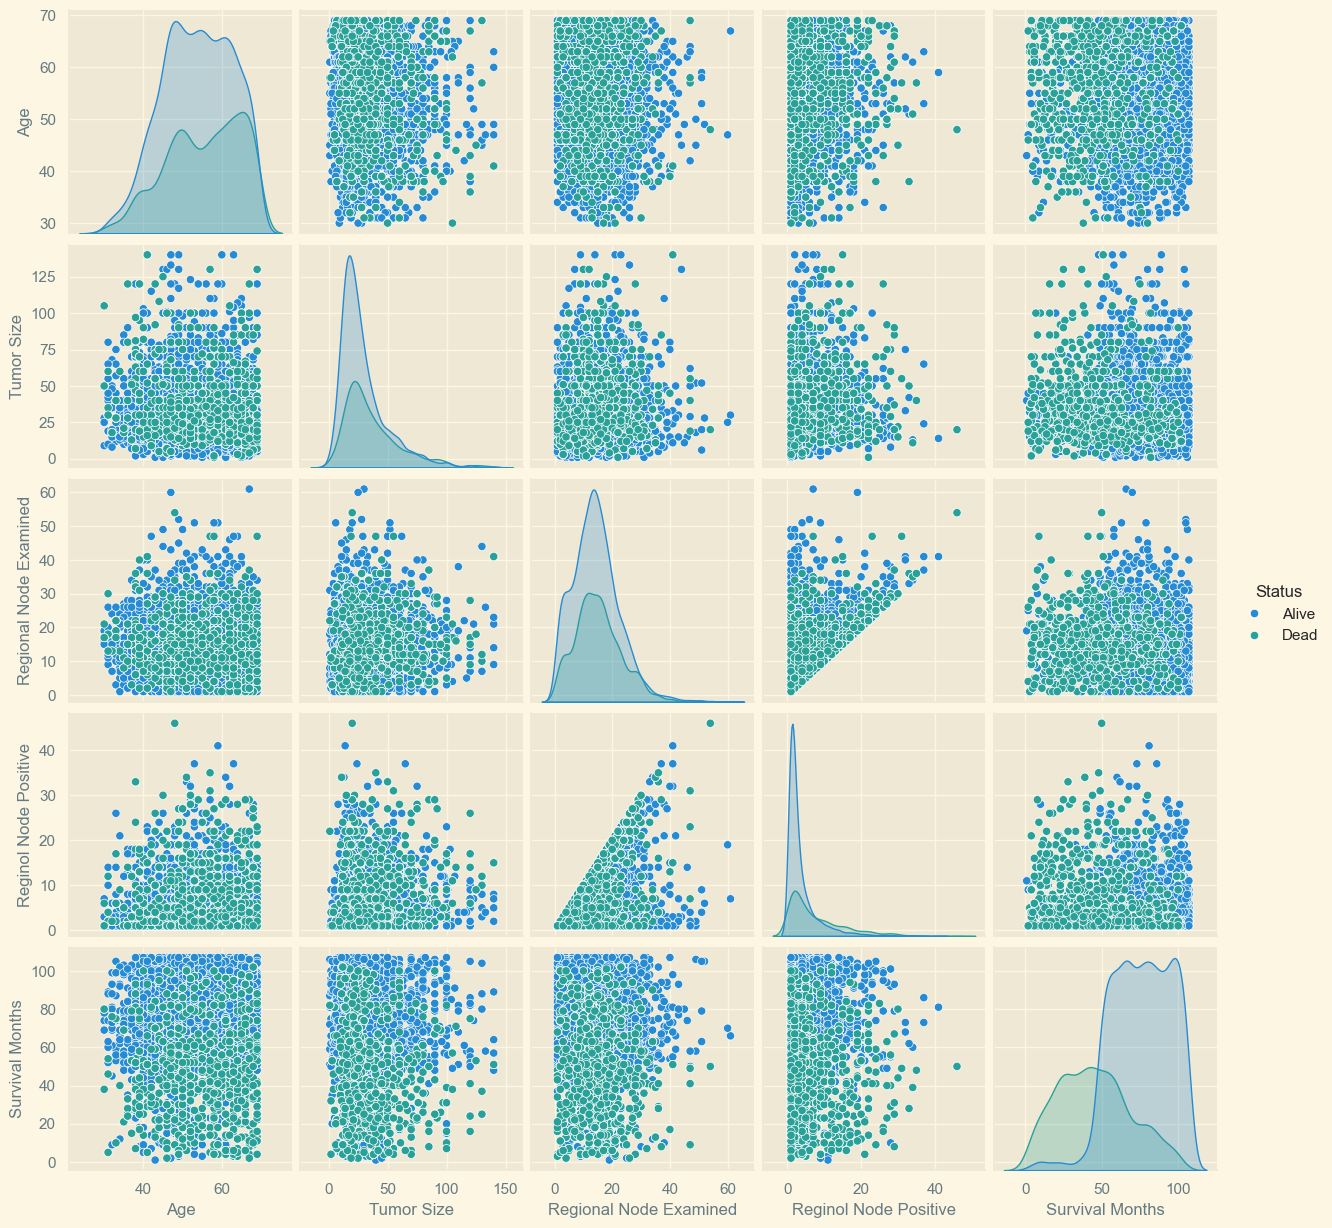

In [23]:
sb.pairplot(data = data_re, hue = "Status")
plt.show()

### Separacion Conjuntos

In [24]:
data_pre = data_re.copy()
num_cols = data_pre.select_dtypes(include=["float64", "int64"]).columns.to_list()
cat_cols = data_pre.drop("Status", axis=1).select_dtypes(include="object").columns.to_list()
y_cols = data_pre[["Status"]].columns.to_list()

X = data_pre.drop("Status", axis=1)
Y = data_pre[["Status"]]

Separamos los conjuntos antes de realizar transformaciones para evitar fuga de datos, de esta forma los transformadores solo tienen conocimiento del conjunto de entrenamiento y no de los de prueba o validación

In [25]:
# Escogeremos un 5% de los datos para validación, del resto un 85% para entrenamiento (con validación cruzada) y un 25% para prueba
x_train_pre, x_val_pre, y_train_pre, y_val_pre = train_test_split(
    X,                  # Features (excluding target)
    Y,                  # Target column
    test_size=0.05,     # Adjust split size as needed
    stratify=Y,         # Stratify on the target
    random_state=42     # Set a seed for reproducibility
)

x_train_pre, x_test_pre, y_train_pre, y_test_pre = train_test_split(
    x_train_pre, 
    y_train_pre, 
    test_size=0.15,
    random_state=42,
    stratify=y_train_pre
)


### Transformación Variables

In [ ]:
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))])
y_transformer = Pipeline(steps = [("ordinal", OrdinalEncoder())])

preprocesador = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
], remainder = 'passthrough')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Tumor Size', 'Regional Node Examined',
                                  'Reginol Node Positive', 'Survival Months']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Race', 'Marital Status', 'T Stage ',
                                  'N Stage', '6th Stage', 'differentiate',
                                  'Grade'])])

In [27]:
x_train = preprocesador.fit_transform(x_train_pre)
x_test = preprocesador.transform(x_test_pre)
x_val = preprocesador.transform(x_val_pre)

y_train = y_transformer.fit_transform(y_train_pre.values.reshape(-1, 1))
y_test = y_transformer.transform(y_test_pre.values.reshape(-1, 1))
y_val = y_transformer.transform(y_val_pre.values.reshape(-1, 1))

In [28]:
# num_cols = data_re.select_dtypes(include=["float64", "int64"]).columns.to_list()
# cat_cols = data_re.drop("Status", axis=1).select_dtypes(include="object").columns.to_list()
# y_cols = data_re[["Status"]].columns.to_list()

# num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
# cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))])
# y_transformer = Pipeline(steps = [("ordinal", OrdinalEncoder())])

# preprocesador = ColumnTransformer(transformers = [
#     ('num', num_transformer, num_cols),
#     ('cat', cat_transformer, cat_cols),
#     ("ord", y_transformer, y_cols)
# ], remainder = 'passthrough')
# preprocesador


In [29]:
# data_pre = preprocesador.fit_transform(data_re)
# data_pre.columns = [col.replace('cat__', '').replace('num__', '').replace('ord__', '') for col in data_pre.columns]
# data_pre.head()

## Modelado

ea un diccionario que contenga todos los modelos que deseas evaluar junto con sus respectivos espacios de hiperparámetros. Esto facilitará la iteración y automatización del proceso de búsqueda.

In [30]:

modelos = {
    'LogisticRegression': ( #Regresión Logística
        LogisticRegression(max_iter=1000, random_state=42),
        {
            'C': [0.01, 0.1, 1, 10, 100], # Inversa del parámetro de regularización
            'penalty': ['l2'], # Norma de penalización
            'solver': ['lbfgs', 'saga'] # Algoritmo a utilizar
        }
    ),
    'KNN': ( #K Vecinos más cercanos
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 9, 11], # número de vecinos
            'p': [1, 2], # 1: manhattan, 2: euclidean
            'weights': ['uniform', 'distance'] # uniforme: todos los vecinos tienen el mismo peso, distance: los vecinos más cercanos tienen más peso
        }
    ),
    'SVC': ( #Support Vector Classifier
        SVC(probability=True, random_state=42),
        {
            'C': [0.001, 0.01, 1, 10, 15, 20, 25], # Inversa del parámetro de regularización
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Kernel a utilizar
            'degree': [2, 3, 4, 5], # Grado del polinomio
            'gamma': ['scale', 'auto'] # Coeficiente del kernel
        }
    ),
    'DecisionTree': ( # Árbol de Decisión
        DecisionTreeClassifier(random_state=42),
        {
            'max_depth': [None, 10, 20, 30], # Profundidad máxima del árbol
            'min_samples_split': [2, 5, 10], # Número mínimo de muestras para dividir un nodo
            'min_samples_leaf': [1, 2, 4], # Número mínimo de muestras en un nodo hoja
            'criterion': ['gini', 'entropy'] # Función para medir la calidad de una división
        }
    ),
    'GaussianNB': ( # Naive Bayes
        GaussianNB(),
        {}  # Naive Bayes no tiene muchos hiperparámetros para ajustar
    ),
    'RandomForest': ( # Bosque Aleatorio
        RandomForestClassifier(random_state=42),
        {
            'n_estimators': [100, 200, 300], # Número de árboles en el bosque
            'max_depth': [None, 10, 20, 30], # Profundidad máxima de los árboles
            'min_samples_split': [2, 5, 10], # Número mínimo de muestras para dividir un nodo
            'min_samples_leaf': [1, 2, 4], # Número mínimo de muestras en un nodo hoja
            'bootstrap': [True, False] # Muestreo con reemplazo
        }
    ),
    'AdaBoost': ( # AdaBoost Classifier
        AdaBoostClassifier(random_state=42),
        {
            'n_estimators': [50, 100, 200], # Número de árboles en el bosque
            'learning_rate': [0.01, 0.1, 1, 10], # Tasa de aprendizaje
            'algorithm': ['SAMME'] # Algoritmo a utilizar
        }
    ),
    'GradientBoosting': ( # Gradient Boosting Classifier
        GradientBoostingClassifier(random_state=42),
        {
            'n_estimators': [100, 200, 300], # Número de árboles en el bosque
            'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
            'max_depth': [3, 5, 7], # Profundidad máxima de los árboles
            'min_samples_split': [2, 5, 10], # Número mínimo de muestras para dividir un nodo
            'min_samples_leaf': [1, 2, 4] # Número mínimo de muestras en un nodo hoja
        }
    ),
    'MLP': ( # Multi-layer Perceptron
        MLPClassifier(random_state=42, max_iter=1000),
        {
            'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 25)], # Número de neuronas en cada capa
            'activation': ['identity', 'logistic', 'tanh', 'relu'], # Función de activación
            'solver': ['adam', 'sgd', 'lbfgs'], # Algoritmo a utilizar
            'alpha': [1e-5, 1e-4, 1e-3] # Tasa de regularización
        }
    )
}


Función para Buscar Hiperparámetros

In [31]:
def buscar_hiperparametros(modelo, parametros, X_train, y_train, scoring, cv=3, search_type='grid', n_iter=50):
    """
    Busca los mejores hiperparámetros para un modelo dado.

    Args:
        modelo: El estimador de sklearn.
        parametros: Diccionario de hiperparámetros.
        X_train: Datos de entrenamiento.
        y_train: Etiquetas de entrenamiento.
        scoring: Métricas de evaluación.
        cv: Número de folds para la validación cruzada.
        search_type: Tipo de búsqueda ('grid' o 'random').
        n_iter: Número de combinaciones a probar (solo para 'random').

    Returns:
        Objeto de búsqueda con los resultados.
    """
    if search_type == 'grid':
        busqueda = GridSearchCV(
            estimator=modelo,
            param_grid=parametros,
            scoring=scoring,
            refit='accuracy',  # Métrica principal para refit
            cv=cv,
            n_jobs=-1,
            verbose=1
        )
    elif search_type == 'random':
        busqueda = RandomizedSearchCV(
            estimator=modelo,
            param_distributions=parametros,
            n_iter=n_iter,
            scoring=scoring,
            refit='accuracy',
            cv=cv,
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
    else:
        raise ValueError("El parámetro 'search_type' debe ser 'grid' o 'random'")
    
    busqueda.fit(X_train, y_train)
    return busqueda


Función para Obtener Resultados de Validación

In [32]:
def obtener_resultados(busqueda, metricas=['mean_test_accuracy', 'mean_test_precision_weighted', 
                                         'mean_test_recall_weighted', 'mean_test_f1_weighted',
                                         'std_test_accuracy', 'std_test_precision_weighted',
                                         'std_test_recall_weighted', 'std_test_f1_weighted']):
    """
    Extrae y organiza los resultados de la búsqueda de hiperparámetros.

    Args:
        busqueda: Objeto GridSearchCV o RandomizedSearchCV con los resultados.
        metricas: Lista de métricas a extraer.

    Returns:
        DataFrame con parámetros evaluados y métricas correspondientes.
    """
    resultados = pd.concat([
        pd.DataFrame(busqueda.cv_results_['params']),
        pd.DataFrame(busqueda.cv_results_)[metricas]
    ], axis=1)
    
    return resultados


Función para Validación Cruzada en Múltiples Modelos

In [33]:
from sklearn.model_selection import cross_validate

def validar_modelos_cv(X, Y, lista_modelos, scoring, cv=10):
    """
    Realiza validación cruzada para múltiples modelos y devuelve las métricas.

    Args:
        X: Datos de características.
        Y: Etiquetas.
        lista_modelos: Lista de estimadores de sklearn.
        scoring: Lista o diccionario de métricas de evaluación.
        cv: Número de folds para la validación cruzada.

    Returns:
        DataFrame con las métricas promedio y desviaciones estándar de cada modelo.
    """
    resultados = {}
    
    for modelo in lista_modelos:
        nombre = modelo.__class__.__name__
        print(f"Validando modelo: {nombre}")
        scores = cross_validate(modelo, X, Y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)
        resultados[nombre] = {
            'accuracy_mean': scores['test_accuracy'].mean(),
            'accuracy_std': scores['test_accuracy'].std(),
            'precision_mean': scores['test_precision_weighted'].mean(),
            'precision_std': scores['test_precision_weighted'].std(),
            'recall_mean': scores['test_recall_weighted'].mean(),
            'recall_std': scores['test_recall_weighted'].std(),
            'f1_mean': scores['test_f1_weighted'].mean(),
            'f1_std': scores['test_f1_weighted'].std(),
        }
    
    return pd.DataFrame(resultados).T


### Ejecutar la Búsqueda de Hiperparámetros para Todos los Modelos

In [34]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [35]:
# Definir las métricas de scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall_weighted': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=0)
}

# Diccionario para almacenar los resultados de la búsqueda de hiperparámetros
resultados_hiperparametros = {}

for nombre, (modelo, parametros) in modelos.items():
    print(f"Buscando hiperparámetros para {nombre}...")
    
    # Si el espacio de hiperparámetros está vacío, saltar la búsqueda
    if not parametros:
        modelo.fit(x_train, y_train_array)
        resultados_hiperparametros[nombre] = {
            'best_params': modelo.get_params(),
            'best_score': modelo.score(x_train, y_train_array),
            'cv_results': None
        }
        print(f"{nombre} no tiene hiperparámetros para ajustar.\n")
        continue
    
    # Si hay hiperparametros se llama a la función buscar_hiperparametros y obtener_resultados
    # Convertir y_train a un arreglo de NumPy y aplanarlo
    y_train_array = y_train.values.ravel()
    
    # Realizar la búsqueda de hiperparámetros
    busqueda = buscar_hiperparametros(
        modelo=modelo,
        parametros=parametros,
        X_train=x_train,
        y_train=y_train_array,
        scoring=scoring,
        cv=3,
        search_type='grid'  # Cambia a 'random' si se queiere RandomizedSearchCV para búsqueda aleatoria con n_iter
    )
    
    # Extraer los resultados
    resultados = obtener_resultados(busqueda)
    
    # Almacenar los mejores parámetros y el mejor score (accuracy en este caso)
    resultados_hiperparametros[nombre] = {
        'best_params': busqueda.best_params_,
        'best_score': busqueda.best_score_,
        'cv_results': resultados
    }
    
    print(f"Mejores parámetros para {nombre}: {busqueda.best_params_}")
    print(f"Mejor score para {nombre} (accuracy): {busqueda.best_score_}\n")


Buscando hiperparámetros para LogisticRegression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros para LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor score para LogisticRegression (accuracy): 0.8265802350048231

Buscando hiperparámetros para KNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores parámetros para KNN: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Mejor score para KNN (accuracy): 0.8760593626248037

Buscando hiperparámetros para SVC...
Fitting 3 folds for each of 224 candidates, totalling 672 fits
Mejores parámetros para SVC: {'C': 15, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
Mejor score para SVC (accuracy): 0.8459015765281728

Buscando hiperparámetros para DecisionTree...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros para DecisionTree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor score para Dec

### Comparar los Resultados de los Modelos

In [36]:
# Crear una lista vacía para almacenar los modelos instanciados con los mejores hiperparámetros
mejores_modelos = []
nombres_modelos = []

# Recorrer el diccionario de los mejores hiperparámetros obtenidos
for nombre, resultado in resultados_hiperparametros.items():
    # Obtener el modelo base
    modelo = modelos[nombre][0]
    
    # Obtener los mejores hiperparámetros
    best_params = resultado['best_params']
    
    # Actualizar el modelo con los mejores hiperparámetros
    modelo.set_params(**best_params)
    
    # Almacenar el modelo en la lista
    mejores_modelos.append(modelo)
    nombres_modelos.append(nombre)


In [37]:
## Visualizar los mejores hiperparámetros de cada modelo
import json
modelos_mejores_params_json = {}

# Recorrer la lista de modelos con los mejores parámetros
for nombre, modelo in zip(nombres_modelos, mejores_modelos):
    # Almacenar en el diccionario el nombre del modelo y sus parámetros
    if hasattr(modelo, 'get_params'):
        modelos_mejores_params_json[nombre] = modelo.get_params()

# Convertir a JSON para mostrarlo en la salida de la celda
mejores_modelos_json = json.dumps(modelos_mejores_params_json, indent=4)
print(mejores_modelos_json)

{
    "LogisticRegression": {
        "C": 10,
        "class_weight": null,
        "dual": false,
        "fit_intercept": true,
        "intercept_scaling": 1,
        "l1_ratio": null,
        "max_iter": 1000,
        "multi_class": "auto",
        "n_jobs": null,
        "penalty": "l2",
        "random_state": 42,
        "solver": "lbfgs",
        "tol": 0.0001,
        "verbose": 0,
        "warm_start": false
    },
    "KNN": {
        "algorithm": "auto",
        "leaf_size": 30,
        "metric": "minkowski",
        "metric_params": null,
        "n_jobs": null,
        "n_neighbors": 11,
        "p": 2,
        "weights": "distance"
    },
    "SVC": {
        "C": 15,
        "break_ties": false,
        "cache_size": 200,
        "class_weight": null,
        "coef0": 0.0,
        "decision_function_shape": "ovr",
        "degree": 5,
        "gamma": "scale",
        "kernel": "poly",
        "max_iter": -1,
        "probability": true,
        "random_state": 42,
   

# Realizar Validación Cruzada con los Mejores Modelos

In [38]:
# Definir las métricas de scoring para la validación cruzada
scoring_cv = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted'
}

In [ ]:
# Diccionario para almacenar los resultados de la validación cruzada
resultados_cv = {}

# Realizar validación cruzada para todos los modelos con los mejores parámetros
for nombre, modelo in zip(nombres_modelos, mejores_modelos):
    print(f"Validando modelo: {nombre}")
    
    # Ejecutar validación cruzada con 10 folds
    scores = cross_validate(
        modelo, 
        x_train, 
        y_train_array, 
        scoring=scoring_cv, 
        cv=10, 
        n_jobs=-1, 
        return_train_score=False
    )
    
    # Calcular la media y desviación estándar de las métricas
    resultados_cv[nombre] = {
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'precision_mean': scores['test_precision_weighted'].mean(),
        'precision_std': scores['test_precision_weighted'].std(),
        'recall_mean': scores['test_recall_weighted'].mean(),
        'recall_std': scores['test_recall_weighted'].std(),
        'f1_mean': scores['test_f1_weighted'].mean(),
        'f1_std': scores['test_f1_weighted'].std(),
    }

# Convertir los resultados a un DataFrame para una mejor visualización
comparacion_cv = pd.DataFrame(resultados_cv).T


Validando modelo: LogisticRegression
Validando modelo: KNN
Validando modelo: SVC
Validando modelo: DecisionTree
Validando modelo: GaussianNB
Validando modelo: RandomForest
Validando modelo: AdaBoost


In [40]:
comparacion_cv

accuracy_mean  accuracy_std  precision_mean  \
LogisticRegression       0.825873      0.017107        0.824009   
KNN                      0.894906      0.020971        0.906295   
SVC                      0.847555      0.023603        0.846928   
DecisionTree             0.901760      0.017696        0.911239   
GaussianNB               0.738931      0.022745        0.731458   
RandomForest             0.954529      0.010516        0.954833   
AdaBoost                 0.830826      0.012595        0.831089   
GradientBoosting         0.941340      0.016335        0.943149   
MLP                      0.916593      0.011418        0.922526   

                    precision_std  recall_mean  recall_std   f1_mean    f1_std  
LogisticRegression       0.017627     0.825873    0.017107  0.822083  0.017980  
KNN                      0.018728     0.894906    0.020971  0.896592  0.020528  
SVC                      0.024310     0.847555    0.023603  0.846587  0.023839  
DecisionTree             0.013831     0.901760    0.017696  0.903189  0.017177  
GaussianNB               0.024413     0.738931    0.022745  0.731324  0.023844  
RandomForest             0.010237     0.954529    0.010516  0.954569  0.010461  
AdaBoost                 0.012729     0.830826    0.012595  0.825500  0.013603  
GradientBoosting         0.015541     0.941340    0.016335  0.941677  0.016116  
MLP                      0.008811     0.916593    0.011418  0.917549  0.011047

Se eligió **RandomForest** como el mejor modelo debido a su excelente rendimiento en todas las métricas clave: obtuvo el mayor **accuracy** (95.45%), además de destacar en **precision**, **recall** y **F1-score**, con valores cercanos al 95.48% en todas ellas. Adicionalmente, mostró una **baja desviación estándar** en todas las métricas, lo que indica un comportamiento consistente y estable durante la validación cruzada. Estos resultados sugieren que RandomForest no solo logra una alta precisión en las predicciones, sino que también generaliza bien en los datos, lo que lo convierte en la mejor opción para este problema.

Una vez identificado el mejor modelo a través de la validación cruzada, es importante evaluarlo en el conjunto de prueba para obtener una estimación realista de su rendimiento.

In [41]:
# Instanciar el modelo con los mejores parámetros
modelo_final = mejores_modelos[3]

# Entrenar el modelo final con todo el conjunto de entrenamiento
modelo_final.fit(x_train, y_train_array)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Evaluación del Modelo Final en el Conjunto de Prueba:
Accuracy: 0.9279
Precision: 0.9353
Recall: 0.9279
F1 Score: 0.9289


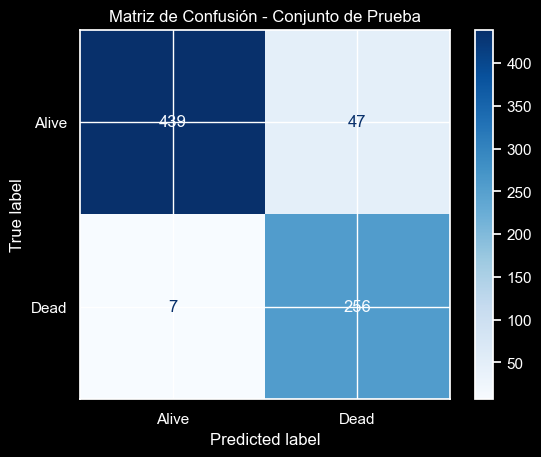

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred_test = modelo_final.predict(x_test)
y_test_array = y_test.to_numpy().ravel()

# Evaluar el modelo
print("Evaluación del Modelo Final en el Conjunto de Prueba:")
print(f"Accuracy: {accuracy_score(y_test_array, y_pred_test):.4f}")
print(f"Precision: {precision_score(y_test_array, y_pred_test, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_array, y_pred_test, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test_array, y_pred_test, average='weighted'):.4f}")

# Matriz de Confusión
cm_test = confusion_matrix(y_test_array, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(Y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()

La matriz de confusión muestra que el modelo de clasificación tiene un rendimiento general bueno. El modelo predijo correctamente que **439** individuos estaban vivos y que **256** estaban muertos, lo que corresponde a los verdaderos positivos y los verdaderos negativos, respectivamente. Sin embargo, cometió algunos errores: clasificó erróneamente a **47** personas vivas como muertas (falsos positivos) y a **7** personas muertas como vivas (falsos negativos). Esto indica que el modelo tiene una alta precisión en ambas clases, aunque presenta un leve número de errores, particularmente en falsos positivos. Dependiendo del contexto, como en situaciones críticas donde es importante minimizar falsos negativos (por ejemplo, en diagnósticos médicos), estos resultados podrían ser aceptables o necesitar ajustes para mejorar la sensibilidad o precisión del modelo.

In [43]:
# Informe de Clasificación Completo
print("Informe de Clasificación Completo:")
print(classification_report(y_test_array, y_pred_test))

Informe de Clasificación Completo:
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       486
         1.0       0.84      0.97      0.90       263

    accuracy                           0.93       749
   macro avg       0.91      0.94      0.92       749
weighted avg       0.94      0.93      0.93       749



Evaluación Adicional de Métricas
Además de las métricas de clasificación estándar, considera evaluar AUC-ROC y curvas Precision-Recall

AUC-ROC: 0.9383


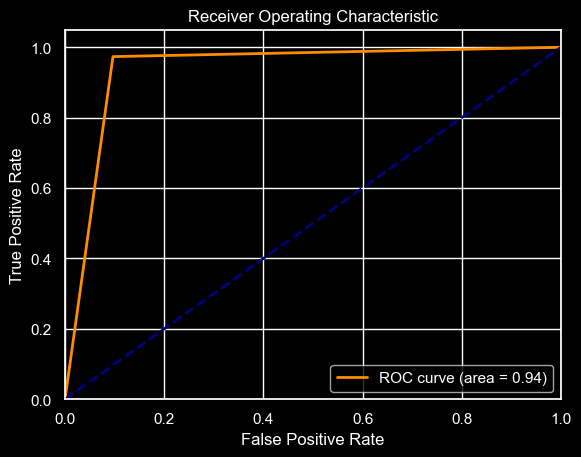

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Calcular el AUC-ROC
y_prob = modelo_final.predict_proba(x_test)[:, 1]  # Asumiendo binario
auc_score = roc_auc_score(y_test_array, y_prob)
print(f"AUC-ROC: {auc_score:.4f}")

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_array, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


La curva ROC muestra que el modelo tiene un rendimiento excelente para la tarea de clasificación. La curva se aproxima al vértice superior izquierdo, lo que indica una alta tasa de verdaderos positivos (sensibilidad) y una baja tasa de falsos positivos. El AUC (Área Bajo la Curva) es de 0.94, lo que significa que el modelo es altamente capaz de distinguir entre las clases. Cuanto más cercano a 1 esté el AUC, mejor es el rendimiento del modelo. Esto sugiere que el modelo hace predicciones precisas y confiables, siendo muy eficaz en la clasificación binaria al mantener una alta tasa de aciertos y pocos errores.

# Multiclasificadores

In [45]:
def seleccionar_mejores_modelos(resultados_cv, n_mejores=3, pesos=None):
    """
    Selecciona los mejores modelos basados en un score ponderado de accuracy, precision, recall y F1-Score.

    Args:
        resultados_cv: Diccionario que contiene las métricas de validación cruzada para cada modelo.
        n_mejores: Número de mejores modelos a seleccionar (por defecto es 3).
        pesos: Diccionario con los pesos para cada métrica, ej: {'accuracy': 0.4, 'precision': 0.2, 'recall': 0.2, 'f1': 0.2}

    Returns:
        DataFrame con los mejores modelos seleccionados.
    """
    # Convertir el diccionario en un DataFrame
    df_resultados = pd.DataFrame(resultados_cv).T
    
    # Establecer pesos por defecto si no se proporcionan
    if pesos is None:
        pesos = {'accuracy': 0.4, 'precision': 0.2, 'recall': 0.2, 'f1': 0.2}
    
    # Normalizar las métricas para que estén en el rango [0, 1]
    normalizado = pd.DataFrame(index=df_resultados.index)
    for metrica in ['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean']:
        normalizado[metrica] = (df_resultados[metrica] - df_resultados[metrica].min()) / (df_resultados[metrica].max() - df_resultados[metrica].min())
    
    # Calcular el score ponderado
    df_resultados['score'] = (
        pesos['accuracy'] * normalizado['accuracy_mean'] +
        pesos['precision'] * normalizado['precision_mean'] +
        pesos['recall'] * normalizado['recall_mean'] +
        pesos['f1'] * normalizado['f1_mean']
    )
    
    # Seleccionar los n_mejores modelos con mayor score
    mejores_modelos = df_resultados.sort_values(by='score', ascending=False).head(n_mejores)
    
    return mejores_modelos


### Seleccionamos los 3 mejores modelos

In [46]:
mejores_modelos_multi = seleccionar_mejores_modelos(resultados_cv, n_mejores=3)
print(mejores_modelos_multi)

[LogisticRegression(C=10, max_iter=1000, random_state=42), KNeighborsClassifier(n_neighbors=11, weights='distance'), SVC(C=15, degree=5, kernel='poly', probability=True, random_state=42), DecisionTreeClassifier(criterion='entropy', random_state=42), GaussianNB(), RandomForestClassifier(bootstrap=False, n_estimators=200, random_state=42), AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=100,
                   random_state=42), GradientBoostingClassifier(max_depth=7, n_estimators=200, random_state=42), MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=1000,
              random_state=42, solver='lbfgs')]


### Hard Voting

Evaluación del Modelo Final Multiclase en el Conjunto de Prueba:
Accuracy: 0.9493
Precision: 0.9515
Recall: 0.9493


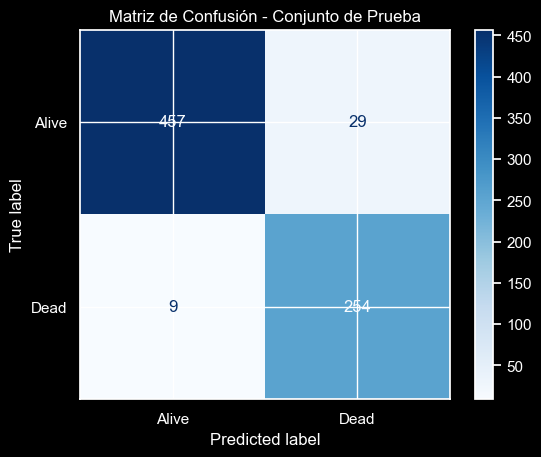

In [47]:
## Ahora hacemos multiclasificador con los mejores modelos multi, vamos a hacer un hard voting
from sklearn.ensemble import VotingClassifier

# Crear una lista de tuplas con el nombre del modelo y el modelo instanciado
modelos_multi = [(nombre, modelo) for nombre, modelo in zip(nombres_modelos, mejores_modelos)]

# Instanciar el VotingClassifier con los modelos seleccionados
voting_clf = VotingClassifier(estimators=modelos_multi, voting='hard')

# Entrenar el VotingClassifier
voting_clf.fit(x_train, y_train_array)

# Hacer predicciones en el conjunto de prueba
y_pred_test_multi = voting_clf.predict(x_test)

# Evaluar el modelo
print("Evaluación del Modelo Final Multiclase en el Conjunto de Prueba:")
print(f"Accuracy: {accuracy_score(y_test_array, y_pred_test_multi):.4f}")
print(f"Precision: {precision_score(y_test_array, y_pred_test_multi, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_array, y_pred_test_multi, average='weighted'):.4f}")

# Matriz de Confusión
cm_test_multi = confusion_matrix(y_test_array, y_pred_test_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_test_multi, display_labels=np.unique(Y))
disp_multi.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()

### Soft Voting

Evaluación del Modelo Final Multiclase en el Conjunto de Prueba:
Accuracy: 0.9559
Precision: 0.9573
Recall: 0.9559


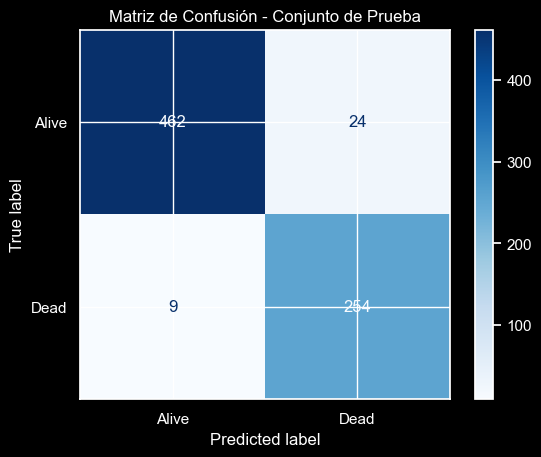

In [49]:
# Crear una lista de tuplas con el nombre del modelo y el modelo instanciado
modelos_multi = [(nombre, modelo) for nombre, modelo in zip(nombres_modelos, mejores_modelos)]

# Instanciar el VotingClassifier con los modelos seleccionados
voting_clf = VotingClassifier(estimators=modelos_multi, voting='soft')

# Entrenar el VotingClassifier
voting_clf.fit(x_train, y_train_array)

# Hacer predicciones en el conjunto de prueba
y_pred_test_multi = voting_clf.predict(x_test)

# Evaluar el modelo
print("Evaluación del Modelo Final Multiclase en el Conjunto de Prueba:")
print(f"Accuracy: {accuracy_score(y_test_array, y_pred_test_multi):.4f}")
print(f"Precision: {precision_score(y_test_array, y_pred_test_multi, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_array, y_pred_test_multi, average='weighted'):.4f}")

# Matriz de Confusión
cm_test_multi = confusion_matrix(y_test_array, y_pred_test_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_test_multi, display_labels=np.unique(Y))
disp_multi.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()